In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("/Users/yashadmuthe/Desktop/ViewingActivity-sample.csv")

In [13]:
df.shape


(200, 10)

In [14]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [17]:
df=df.drop(['Profile Name','Attributes','Supplemental Video Type','Device Type','Bookmark','Latest Bookmark','Country'], axis=1)

In [18]:
df.head()


,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


In [19]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [20]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [22]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head()

,Start Time,Duration,Title
0,2013-03-20 01:17:53-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 00:27:45-04:00,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 00:05:21-04:00,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19 20:20:03-04:00,0:48:14,The Invisible War
4,2013-03-19 20:10:31-04:00,0:04:51,The Invisible War


In [24]:
df['Duration']= pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [25]:
# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'The Office (U.S.)'
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

In [26]:
office.shape

(137, 3)

In [27]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(130, 3)

In [28]:
office.shape

(130, 3)

In [29]:
office['Duration'].sum()


Timedelta('1 days 14:57:28')

In [30]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

# check to make sure the columns were added correctly
office.head(1)

,Start Time,Duration,Title,weekday,hour
10,2013-03-18 19:04:22-04:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0,19


In [31]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

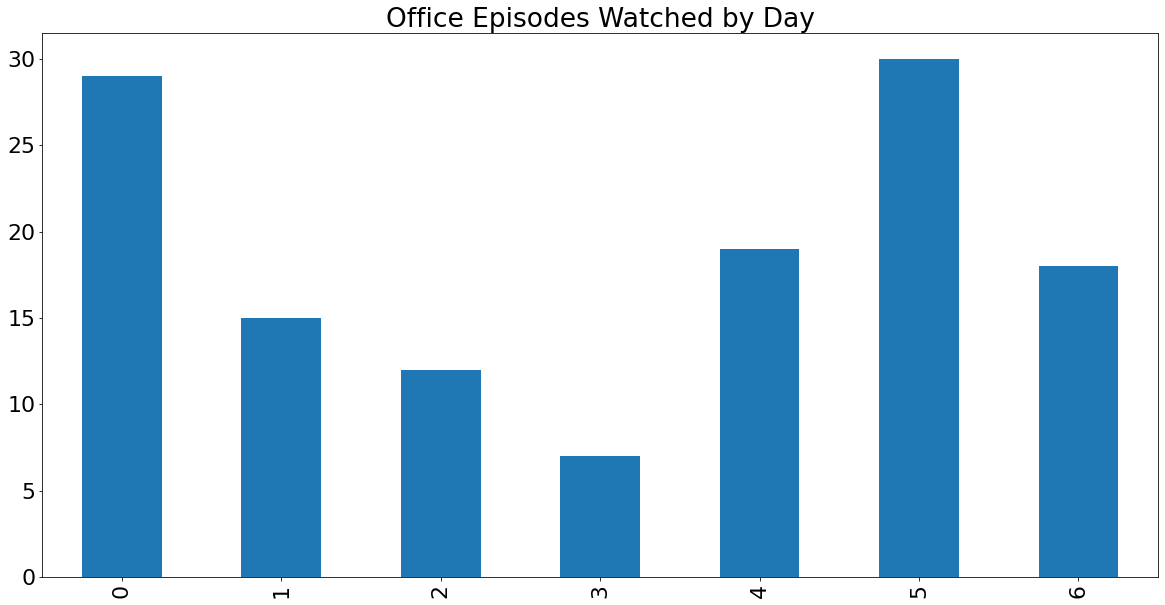

In [32]:
# set our categorical and define the order so the days are plotted Monday-Sunday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

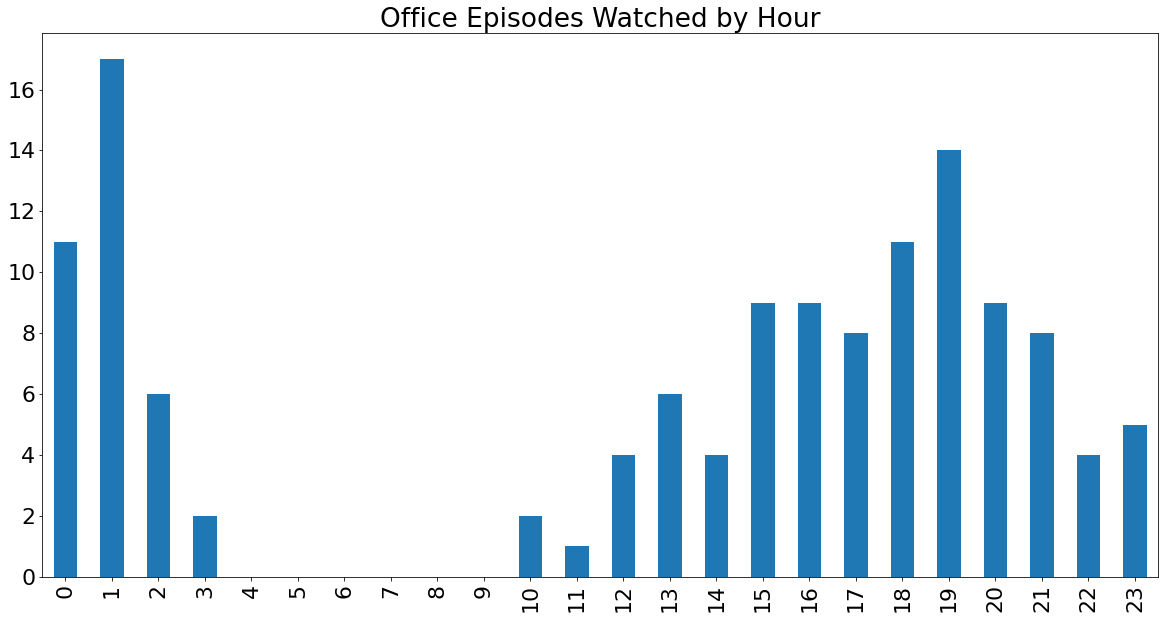

In [33]:
# set our categorical and define the order so the hours are plotted 0-23
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
office_by_hour = office['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')